In [45]:
# !pip install numpy==1.21.6
# !pip install scikit-learn==1.5.2

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 3.1 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.0 MB 2.8 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.0 MB 2.9 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 2.9 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.0 MB 2.7 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.0 MB 2.9 MB/s eta 0:00:03
   ------------------- -------------------- 5.2/11.0 MB 3.2 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/11.0 MB 3.2 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/11.0 MB 3.2 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 2.8 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 2.8 MB/s eta 0:00:02
   ---

  You can safely remove it manually.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
# from ctgan import CTGAN
import warnings
warnings.simplefilter(action='ignore')

df = pd.read_excel("Diplomat Nursing Home Data-8.xlsx")
print(df.keys())

Index(['Bed Occupancy', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'U

In [2]:
df_bed_occ = pd.read_excel('Diplomat Nursing Home Data-8.xlsx',sheet_name='Bed Occupancy') # Hope
df_dial_occ = pd.read_excel('Diplomat Nursing Home Data-8.xlsx',sheet_name='Dialysis Occupancy') # Unable to Work
df_lab_occ = pd.read_excel('Diplomat Nursing Home Data-8.xlsx',sheet_name='LAB') # Unable to work
df_ot_occ = pd.read_excel('Diplomat Nursing Home Data-8.xlsx',sheet_name='OT Occupancy') # Hope
df_pharm_occ = pd.read_excel('Diplomat Nursing Home Data-8.xlsx',sheet_name='Pharmacy') # Unable to Work


In [3]:
print(df_bed_occ.columns)

Index(['Bed Occupancy', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'U

In [4]:
res_col = []
for val in np.ravel(df_bed_occ.iloc[2:3,:].values).tolist():
    if not (isinstance(val,float) and np.isnan(val)):
        res_col.append(val.replace(' ','_'))

print(res_col)
print(len(res_col)) # This is the actual number of columns
res_col = ['Bed_No_1_icu', 'Bed_No_2_icu', 'Bed_No_3_icu', 'Bed_No_4_icu', 'Bed_No_5_icu','Bed_No_6_icu', 
           'Bed_No_1_picu', 'Bed_No_2_picu',
           'Cabin_3A_tsc', 'Cabin_3B_tsc', 'Cabin_5A_tsc', 'Cabin_5B_tsc',
           'Cabin_1_sc', 'Cabin_2_sc', 'Cabin_4_sc', 'Cabin_6_sc', 'Cabin_7_sc',
           'Bed_No_1_gmw', 'Bed_No_2_gmw', 'Bed_No_3_gmw', 'Bed_No_4_gmw', 'Bed_No_5_gmw', 'Bed_No_6_gmw', 'Bed_No_7_gmw', 'Bed_No_8_gmw', 'Bed_No_9_gmw',
           'Bed_No_1_gfw', 'Bed_No_2_gfw', 'Bed_No_3_gfw', 'Bed_No_4_gfw', 'Bed_No_5_gfw', 'Bed_No_6_gfw', 'Bed_No_7_gfw', 'Bed_No_8_gfw', 'Bed_No_9_gfw', 'Bed_No_10_gfw']

['Bed_No_1', 'Bed_No_2', 'Bed_No_3', 'Bed_No_4', 'Bed_No_5', 'Bed_No_6', 'Bed_No_1', 'Bed_No_2', 'Cabin_3A', 'Cabin_3B', 'Cabin_5A', 'Cabin_5B', 'Cabin_1', 'Cabin_2', 'Cabin_4', 'Cabin_6', 'Cabin_7', 'Bed_No_1', 'Bed_No_2', 'Bed_No_3', 'Bed_No_4', 'Bed_No_5', 'Bed_No_6', 'Bed_No_7', 'Bed_No_8', 'Bed_No_9', 'Bed_No_1', 'Bed_No_2', 'Bed_No_3', 'Bed_No_4', 'Bed_No_5', 'Bed_No_6', 'Bed_No_7', 'Bed_No_8', 'Bed_No_9', 'Bed_No_10']
36


In [5]:
df_bed_occ = df_bed_occ.drop(df_bed_occ.index[:2],axis=0)
df_bed_occ.head()

,Bed Occupancy,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
2,NaN,Bed No 1,NaN,Bed No 2,NaN,Bed No 3,NaN,Bed No 4,NaN,Bed No 5,...,Bed No 6,NaN,Bed No 7,NaN,Bed No 8,NaN,Bed No 9,NaN,Bed No 10,NaN
3,2024-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-06-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
chunk_df = df_bed_occ.iloc[:,1:]
columns_to_be_removed = []
for val in range(len(chunk_df.columns)):
    if val%2 == 1:
        columns_to_be_removed.append(chunk_df.columns[val])
    
chunk_df = chunk_df.drop(chunk_df.loc[:,columns_to_be_removed],axis=1)  
chunk_df.reset_index(inplace=True,drop=True)
chunk_df = chunk_df.drop(chunk_df.index[0],axis=0)
chunk_df.columns = res_col
chunk_df.reset_index(inplace=True,drop=True)

In [7]:
df_bed_occ_sample = df_bed_occ.iloc[:,0]
df_bed_occ_sample.reset_index(inplace=True,drop=True)
df_bed_occ_sample = df_bed_occ_sample.drop(df_bed_occ_sample.index[0],axis=0)

df_bed_occ_sample = pd.DataFrame(df_bed_occ_sample.tolist(),columns=["Bed_Occupancy"]) 
df_bed_occ_sample


,Bed_Occupancy
0,2024-06-01
1,2024-06-02
2,2024-06-03
3,2024-06-04
4,2024-06-05
...,...
178,2024-11-26
179,2024-11-27
180,2024-11-28
181,2024-11-29


In [8]:
chunk_df

,Bed_No_1_icu,Bed_No_2_icu,Bed_No_3_icu,Bed_No_4_icu,Bed_No_5_icu,Bed_No_6_icu,Bed_No_1_picu,Bed_No_2_picu,Cabin_3A_tsc,Cabin_3B_tsc,...,Bed_No_1_gfw,Bed_No_2_gfw,Bed_No_3_gfw,Bed_No_4_gfw,Bed_No_5_gfw,Bed_No_6_gfw,Bed_No_7_gfw,Bed_No_8_gfw,Bed_No_9_gfw,Bed_No_10_gfw
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,NaN,GOPAL CHANDRA DAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASOK KUMAR CHATTOPADHYAY,...,NaN,NEHA KHATAN,ARUNA BHATTACHARYYA ROY,CHABI RANI GHOSH,NaN,NaN,NaN,GANGA KOLI,ARUNA CHOWDHURY,CHAMPA SHAW
179,NaN,GOPAL CHANDRA DAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASOK KUMAR CHATTOPADHYAY,...,NaN,NEHA KHATAN,ARUNA BHATTACHARYYA ROY,CHABI RANI GHOSH,NaN,NaN,NaN,GANGA KOLI,ARUNA CHOWDHURY,CHAMPA SHAW
180,NaN,GOPAL CHANDRA DAS,NaN,NaN,NaN,TANDRA NAHA,NaN,NaN,SRIMANTA CHAKRABARTI,ASOK KUMAR CHATTOPADHYAY,...,NaN,NEHA KHATAN,ARUNA BHATTACHARYYA ROY,NaN,NaN,NaN,NaN,GANGA KOLI,ARUNA CHOWDHURY,NaN
181,NaN,GOPAL CHANDRA DAS,NaN,NaN,NaN,TANDRA NAHA,NaN,NaN,SRIMANTA CHAKRABARTI,ASOK KUMAR CHATTOPADHYAY\nHARADHAN KARMAKAR,...,NaN,NEHA KHATAN,ARUNA BHATTACHARYYA ROY,NaN,NaN,NaN,NaN,GANGA KOLI,ARUNA CHOWDHURY,NaN


In [9]:
final_df = df_bed_occ_sample.merge(chunk_df,how='inner',left_index=True,right_index=True)
final_df['Day'] = pd.to_datetime(final_df['Bed_Occupancy']).dt.day
final_df['Month'] = pd.to_datetime(final_df['Bed_Occupancy']).dt.month

final_cols = ['Bed_Occupancy','Day','Month']+res_col
final_df = final_df[final_cols]
final_df = final_df.drop(index=range(0,41))
final_df.reset_index(drop=True,inplace=True)
final_df

,Bed_Occupancy,Day,Month,Bed_No_1_icu,Bed_No_2_icu,Bed_No_3_icu,Bed_No_4_icu,Bed_No_5_icu,Bed_No_6_icu,Bed_No_1_picu,...,Bed_No_1_gfw,Bed_No_2_gfw,Bed_No_3_gfw,Bed_No_4_gfw,Bed_No_5_gfw,Bed_No_6_gfw,Bed_No_7_gfw,Bed_No_8_gfw,Bed_No_9_gfw,Bed_No_10_gfw
0,2024-07-12,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ILA BANDHU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-13,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ILA BANDHU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-07-14,14,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ILA BANDHU,NaN,NaN,NaN,NaN,NaN,NaN,SUBHRA BHATTACHARYA
3,2024-07-15,15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ILA BANDHU,NaN,NaN,NaN,NaN,NaN,NaN,SUBHRA BHATTACHARYA
4,2024-07-16,16,7,RITA RAKSHIT,SRIKUMAR ACHARYA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ILA BANDHU,NaN,NaN,NaN,NaN,NaN,NaN,SUBHRA BHATTACHARYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2024-11-26,26,11,NaN,GOPAL CHANDRA DAS,NaN,NaN,NaN,NaN,NaN,...,NaN,NEHA KHATAN,ARUNA BHATTACHARYYA ROY,CHABI RANI GHOSH,NaN,NaN,NaN,GANGA KOLI,ARUNA CHOWDHURY,CHAMPA SHAW
138,2024-11-27,27,11,NaN,GOPAL CHANDRA DAS,NaN,NaN,NaN,NaN,NaN,...,NaN,NEHA KHATAN,ARUNA BHATTACHARYYA ROY,CHABI RANI GHOSH,NaN,NaN,NaN,GANGA KOLI,ARUNA CHOWDHURY,CHAMPA SHAW
139,2024-11-28,28,11,NaN,GOPAL CHANDRA DAS,NaN,NaN,NaN,TANDRA NAHA,NaN,...,NaN,NEHA KHATAN,ARUNA BHATTACHARYYA ROY,NaN,NaN,NaN,NaN,GANGA KOLI,ARUNA CHOWDHURY,NaN
140,2024-11-29,29,11,NaN,GOPAL CHANDRA DAS,NaN,NaN,NaN,TANDRA NAHA,NaN,...,NaN,NEHA KHATAN,ARUNA BHATTACHARYYA ROY,NaN,NaN,NaN,NaN,GANGA KOLI,ARUNA CHOWDHURY,NaN


In [10]:
unique_patient_checker = {
    'icu': {},
    'post_icu': {},
    'twin_share_cabin': {},
    'single_cabin': {},
    'general_male_word': {},
    'general_female_word': {}
}

for val in final_df.iloc[:, 3:].columns.tolist():
    key = val.split('_')[-1]  # Get the last part of the column name
    unique_values = final_df[val].dropna().unique().tolist() 

    if key == 'icu':
        if val not in unique_patient_checker['icu']:
            unique_patient_checker['icu'][val] = []
        unique_patient_checker['icu'][val].extend(unique_values)
    elif key == 'picu':
        if val not in unique_patient_checker['post_icu']:
            unique_patient_checker['post_icu'][val] = []
        unique_patient_checker['post_icu'][val].extend(unique_values)
    elif key == 'tsc':
        if val not in unique_patient_checker['twin_share_cabin']:
            unique_patient_checker['twin_share_cabin'][val] = []
        unique_patient_checker['twin_share_cabin'][val].extend(unique_values)
    elif key == 'sc':
        if val not in unique_patient_checker['single_cabin']:
            unique_patient_checker['single_cabin'][val] = []
        unique_patient_checker['single_cabin'][val].extend(unique_values)
    elif key == 'gmw':
        if val not in unique_patient_checker['general_male_word']:
            unique_patient_checker['general_male_word'][val] = []
        unique_patient_checker['general_male_word'][val].extend(unique_values) 
    elif key == 'gfw':
        if val not in unique_patient_checker['general_female_word']:
            unique_patient_checker['general_female_word'][val] = []
        unique_patient_checker['general_female_word'][val].extend(unique_values)


print(len(unique_patient_checker['post_icu']['Bed_No_1_picu'])) # Gives 17 which is correct
# len(final_df['Bed_No_1_picu'].dropna().unique()) Gives 17


17


<Axes: >

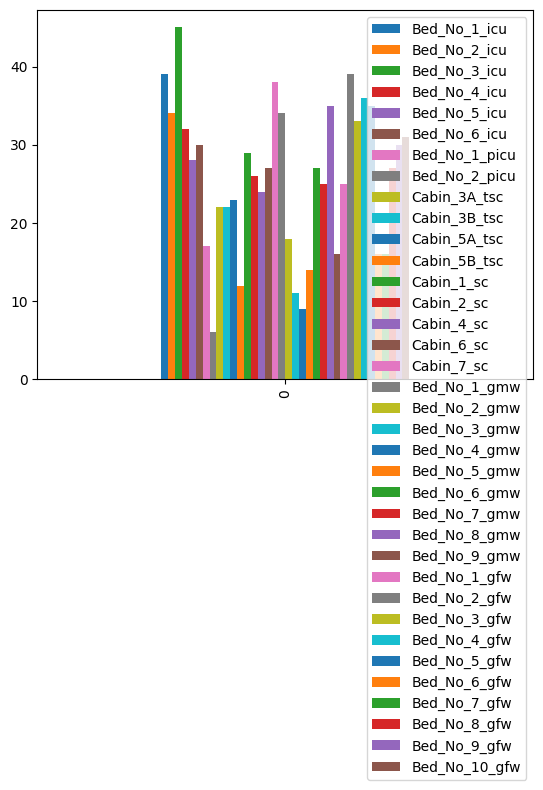

In [11]:
individual_head_count = {}
for keys in unique_patient_checker:
    for inner_keys in unique_patient_checker[keys]:
        individual_head_count[inner_keys] = len(unique_patient_checker[keys].get(inner_keys))
        
unique_persons_count_each_units_bed = pd.DataFrame([individual_head_count])
unique_persons_count_each_units_bed.plot(kind='bar')

In [40]:
unique_patient_checker

{'icu': {'Bed_No_1_icu': ['RITA RAKSHIT',
   'MINA MAJUMDER',
   'SURAJIT GANGULY',
   'RAJULAL ROUTH',
   'TAPAN KUMAR ROY',
   'SOME NATH CHOUDHURY',
   'METULAL SONKAR',
   'PURNIMA NATH',
   'SUPTI DHAR',
   'RUMI SAHA',
   'GOPA ROY',
   'SHIBANI PATHAK',
   'PRAHLAD MURARKHA',
   'ANITA KARMAKAR',
   'KRISHNA RAY',
   'KRISHNA ROY',
   'ARINDAM DUTTA',
   'DEBASISH SIL',
   'SRINATH DEY',
   'MADHUSUDAN DEY',
   'SOUMANDRA NATH SIL',
   'RUCHIKA GARODIA',
   'KHANDKAR RASHIDA BEGUM',
   'BASUDEB GHOSH',
   'ANNAPURNA MONDAL',
   'ANUJ GADIA',
   'DIBYAJYOTI MITRA',
   'HEMLATA PATEL',
   'BIBHAS CHATTERJEE',
   'KOUSHIK BANERJEE',
   'GOURI BARMAN',
   'SUSANTA KUMAR SAHA',
   'NABAKUMAR GHOSH',
   'SANTANU KUMAR MONDAL',
   'BHAGATI MANDAL',
   'JOGMAYA TAH',
   'GITASHANKAR DALUI',
   'KABITA MALLICK',
   'BIRESWAR SAHA'],
  'Bed_No_2_icu': ['SRIKUMAR ACHARYA',
   'MRIDULA MUKHERJEE',
   'SURAJIT GANGULY',
   'INDUREKHA SOM',
   'NIBEDITA ROY',
   'AMIT KR MALLIK',
   'ANIMA DA

In [12]:
def date_giver(curr_col_name,patient_name,desired_col):
    res = [date.strftime('%Y-%m-%d') for date in final_df[final_df[curr_col_name]==patient_name][desired_col].dt.date]
    return res

# print(date_giver('Bed_No_1_icu','RITA RAKSHIT','Bed_Occupancy'))
# Output : ['2024-07-16', '2024-07-17', '2024-07-18', '2024-07-21', '2024-07-22']

In [13]:
repeatitive_patients_names_and_dates = {
    'icu': {},
    'post_icu': {},
    'twin_share_cabin': {},
    'single_cabin': {},
    'general_male_word': {},
    'general_female_word': {}
}

category_dict = {
        'icu':'icu',
        'picu':'post_icu',
        'tsc':'twin_share_cabin',
        'sc':'single_cabin',
        'gmw':'general_male_word',
        'gfw':'general_female_word'
        
}

for val in final_df.iloc[:, 3:].columns.tolist():
    key = val.split('_')[-1]
    
    category = category_dict.get(key) 
    if category:

        if val not in repeatitive_patients_names_and_dates[category]:
            repeatitive_patients_names_and_dates[category][val] = {}
            
        for patient in unique_patient_checker[category][val]:
            if 'patients_cat' not in repeatitive_patients_names_and_dates[category][val] and 'patients_day_count' not in repeatitive_patients_names_and_dates[category][val]:
                repeatitive_patients_names_and_dates[category][val]['patients_cat'] = {}
                repeatitive_patients_names_and_dates[category][val]['patients_day_count'] = {}

            
            
            if patient not in repeatitive_patients_names_and_dates[category][val]['patients_cat']:
                repeatitive_patients_names_and_dates[category][val]['patients_cat'][patient] = []

            res_date = date_giver(val,patient,'Bed_Occupancy')
            repeatitive_patients_names_and_dates[category][val]['patients_cat'][patient].extend(res_date)
            repeatitive_patients_names_and_dates[category][val]['patients_day_count'][patient] = len(res_date)
                
    
repeatitive_patients_names_and_dates

{'icu': {'Bed_No_1_icu': {'patients_cat': {'RITA RAKSHIT': ['2024-07-16',
     '2024-07-17',
     '2024-07-18',
     '2024-07-21',
     '2024-07-22'],
    'MINA MAJUMDER': ['2024-07-19'],
    'SURAJIT GANGULY': ['2024-07-20'],
    'RAJULAL ROUTH': ['2024-07-23',
     '2024-07-24',
     '2024-07-25',
     '2024-07-26',
     '2024-07-27'],
    'TAPAN KUMAR ROY': ['2024-07-30', '2024-07-31'],
    'SOME NATH CHOUDHURY': ['2024-08-02',
     '2024-08-03',
     '2024-08-04',
     '2024-08-05',
     '2024-08-06'],
    'METULAL SONKAR': ['2024-08-09', '2024-08-10'],
    'PURNIMA NATH': ['2024-08-12'],
    'SUPTI DHAR': ['2024-08-13'],
    'RUMI SAHA': ['2024-08-14',
     '2024-08-15',
     '2024-08-16',
     '2024-08-17',
     '2024-08-18',
     '2024-09-16',
     '2024-09-17',
     '2024-09-18',
     '2024-09-19',
     '2024-09-20',
     '2024-09-21',
     '2024-09-22',
     '2024-09-23'],
    'GOPA ROY': ['2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22'],
    'SHIBANI PATHAK': ['2024-08

In [14]:
repeatitive_patients_names_and_dates = {
    'icu': {},
    'post_icu': {},
    'twin_share_cabin': {},
    'single_cabin': {},
    'general_male_word': {},
    'general_female_word': {}
}

category_dict = {
        'icu':'icu',
        'picu':'post_icu',
        'tsc':'twin_share_cabin',
        'sc':'single_cabin',
        'gmw':'general_male_word',
        'gfw':'general_female_word'
        
}

for val in final_df.iloc[:, 3:].columns.tolist():
    key = val.split('_')[-1]
    
    category = category_dict.get(key) 
    if category:

        if val not in repeatitive_patients_names_and_dates[category]:
            repeatitive_patients_names_and_dates[category][val] = {}
            
        for patient in unique_patient_checker[category][val]:
            if 'patients_cat' not in repeatitive_patients_names_and_dates[category][val] and 'patients_day_count' not in repeatitive_patients_names_and_dates[category][val]:
                repeatitive_patients_names_and_dates[category][val]['patients_cat'] = {}
                repeatitive_patients_names_and_dates[category][val]['patients_day_count'] = {}

            
            
            if patient not in repeatitive_patients_names_and_dates[category][val]['patients_cat']:
                repeatitive_patients_names_and_dates[category][val]['patients_cat'][patient] = []

            res_date = date_giver(val,patient,'Bed_Occupancy')
            repeatitive_patients_names_and_dates[category][val]['patients_cat'][patient].extend(res_date)
            repeatitive_patients_names_and_dates[category][val]['patients_day_count'][patient] = len(res_date)
                
    
repeatitive_patients_names_and_dates

{'icu': {'Bed_No_1_icu': {'patients_cat': {'RITA RAKSHIT': ['2024-07-16',
     '2024-07-17',
     '2024-07-18',
     '2024-07-21',
     '2024-07-22'],
    'MINA MAJUMDER': ['2024-07-19'],
    'SURAJIT GANGULY': ['2024-07-20'],
    'RAJULAL ROUTH': ['2024-07-23',
     '2024-07-24',
     '2024-07-25',
     '2024-07-26',
     '2024-07-27'],
    'TAPAN KUMAR ROY': ['2024-07-30', '2024-07-31'],
    'SOME NATH CHOUDHURY': ['2024-08-02',
     '2024-08-03',
     '2024-08-04',
     '2024-08-05',
     '2024-08-06'],
    'METULAL SONKAR': ['2024-08-09', '2024-08-10'],
    'PURNIMA NATH': ['2024-08-12'],
    'SUPTI DHAR': ['2024-08-13'],
    'RUMI SAHA': ['2024-08-14',
     '2024-08-15',
     '2024-08-16',
     '2024-08-17',
     '2024-08-18',
     '2024-09-16',
     '2024-09-17',
     '2024-09-18',
     '2024-09-19',
     '2024-09-20',
     '2024-09-21',
     '2024-09-22',
     '2024-09-23'],
    'GOPA ROY': ['2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22'],
    'SHIBANI PATHAK': ['2024-08

In [136]:
sorted(final_df['Month'].dropna().unique().tolist())

str(repeatitive_patients_names_and_dates['icu']['Bed_No_1_icu']['patients_cat']['RITA RAKSHIT'][0].split('-')[1])


'07'

In [137]:
final_df['Month'].dropna().unique().tolist()
print(str(11))

11


In [15]:
parent_units_monthly_head_count = {}

patients_freq_count = {}
list_patient_wise = {}

month_list = final_df['Month'].dropna().unique().tolist()
for cat in repeatitive_patients_names_and_dates:
    for bed_or_cabin in repeatitive_patients_names_and_dates[cat]:
        for patients in repeatitive_patients_names_and_dates[cat][bed_or_cabin]['patients_cat']:
            for month in month_list:

                if month not in patients_freq_count and month not in list_patient_wise:
                    patients_freq_count[month] = {}
                    list_patient_wise[month] = {}
                
                if cat not in patients_freq_count[month] and cat not in list_patient_wise[month]:
                    patients_freq_count[month][cat] = {}
                    list_patient_wise[month][cat] = {}

                # print(bed_or_cabin , cat , month , patients , repeatitive_patients_names_and_dates[cat][bed_or_cabin]['patients_cat'][patients])
                if any(f"{month:02}" in date[5:7] for date in repeatitive_patients_names_and_dates[cat][bed_or_cabin]['patients_cat'][patients]):
                    patients_freq_count[month][cat][patients] = patients_freq_count[month][cat].get(patients,0)+1

                if patient not in list_patient_wise[month][cat]:
                    list_patient_wise[month][cat][patients] = []
                
                for date in repeatitive_patients_names_and_dates[cat][bed_or_cabin]['patients_cat'][patients]:
                    if f"{month:02}" == date[5:7]:
                        list_patient_wise[month][cat][patients].append(date)
                    
# #                 print(bed_or_cabin , cat , month , patients)
list_patient_wise    

# post_icu SHILA DUTTA 7 ['2024-08-17']
# post_icu SHILA DUTTA 8 ['2024-08-17']
# post_icu SHILA DUTTA 9 ['2024-08-17']
# post_icu SHILA DUTTA 10 ['2024-08-17']
# post_icu SHILA DUTTA 11 ['2024-08-17']

# post_icu PARUL HAZRA 9 ['2024-09-07']
# post_icu PARUL HAZRA 10 ['2024-09-07']
# post_icu PARUL HAZRA 11 ['2024-09-07']

# 7 'post_icu': {'RITA RAKSHIT': 1,
 #   'CHANCHAL KR GHOSH': 1,
 #   'SHILA DUTTA': 1,
 #   'PARUL HAZRA': 1,
 #   'BIMAL KR DUTTA': 1},

# 'SURAJIT GANGULY'

# 'SURAJIT GANGULY': ['2024-07-20'],
# 'SURAJIT GANGULY': ['2024-07-23'],
# 'SURAJIT GANGULY': ['2024-07-21', '2024-07-22'],

# icu SURAJIT GANGULY 7 ['2024-07-20']
# icu SURAJIT GANGULY 8 ['2024-07-20']
# icu SURAJIT GANGULY 9 ['2024-07-20']
# icu SURAJIT GANGULY 10 ['2024-07-20']
# icu SURAJIT GANGULY 11 ['2024-07-20']

# icu SURAJIT GANGULY 7 ['2024-07-23']
# icu SURAJIT GANGULY 8 ['2024-07-23']
# icu SURAJIT GANGULY 9 ['2024-07-23']
# icu SURAJIT GANGULY 10 ['2024-07-23']
# icu SURAJIT GANGULY 11 ['2024-07-23']

# icu SURAJIT GANGULI 7 ['2024-07-17', '2024-07-18']
# icu SURAJIT GANGULI 8 ['2024-07-17', '2024-07-18']
# icu SURAJIT GANGULI 9 ['2024-07-17', '2024-07-18']
# icu SURAJIT GANGULI 10 ['2024-07-17', '2024-07-18']
# icu SURAJIT GANGULI 11 ['2024-07-17', '2024-07-18']



{7: {'icu': {'RITA RAKSHIT': ['2024-07-16',
    '2024-07-17',
    '2024-07-18',
    '2024-07-21',
    '2024-07-22'],
   'MINA MAJUMDER': ['2024-07-19'],
   'SURAJIT GANGULY': ['2024-07-21', '2024-07-22'],
   'RAJULAL ROUTH': ['2024-07-23',
    '2024-07-24',
    '2024-07-25',
    '2024-07-26',
    '2024-07-27'],
   'TAPAN KUMAR ROY': ['2024-07-30', '2024-07-31'],
   'SOME NATH CHOUDHURY': ['2024-07-30', '2024-07-31'],
   'METULAL SONKAR': [],
   'PURNIMA NATH': [],
   'SUPTI DHAR': [],
   'RUMI SAHA': [],
   'GOPA ROY': [],
   'SHIBANI PATHAK': [],
   'PRAHLAD MURARKHA': [],
   'ANITA KARMAKAR': [],
   'KRISHNA RAY': [],
   'KRISHNA ROY': [],
   'ARINDAM DUTTA': [],
   'DEBASISH SIL': [],
   'SRINATH DEY': [],
   'MADHUSUDAN DEY': [],
   'SOUMANDRA NATH SIL': [],
   'RUCHIKA GARODIA': [],
   'KHANDKAR RASHIDA BEGUM': [],
   'BASUDEB GHOSH': [],
   'ANNAPURNA MONDAL': [],
   'ANUJ GADIA': [],
   'DIBYAJYOTI MITRA': [],
   'HEMLATA PATEL': [],
   'BIBHAS CHATTERJEE': [],
   'KOUSHIK BANER

In [16]:
for month in list_patient_wise:
    for unit in list_patient_wise[month]:
        names_to_remove = [
            name
            for name in list_patient_wise[month][unit]
            if len(list_patient_wise[month][unit][name]) == 0
        ]
        for name in names_to_remove:
            list_patient_wise[month][unit].pop(name)

list_patient_wise

{7: {'icu': {'RITA RAKSHIT': ['2024-07-16',
    '2024-07-17',
    '2024-07-18',
    '2024-07-21',
    '2024-07-22'],
   'MINA MAJUMDER': ['2024-07-19'],
   'SURAJIT GANGULY': ['2024-07-21', '2024-07-22'],
   'RAJULAL ROUTH': ['2024-07-23',
    '2024-07-24',
    '2024-07-25',
    '2024-07-26',
    '2024-07-27'],
   'TAPAN KUMAR ROY': ['2024-07-30', '2024-07-31'],
   'SOME NATH CHOUDHURY': ['2024-07-30', '2024-07-31'],
   'SRIKUMAR ACHARYA': ['2024-07-19', '2024-07-20'],
   'MRIDULA MUKHERJEE': ['2024-07-19', '2024-07-20'],
   'INDUREKHA SOM': ['2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27'],
   'NIBEDITA ROY': ['2024-07-28', '2024-07-29'],
   'AMIT KR MALLIK': ['2024-07-30', '2024-07-31'],
   'KRIPASINDHU HALDER': ['2024-07-17', '2024-07-18'],
   'SUJIT KR MITRA': ['2024-07-19', '2024-07-20', '2024-07-21'],
   'RAM PADA DALAL': ['2024-07-23'],
   'BIMAL KR SAHA': ['2024-07-23', '2024-07-24', '2024-07-25'],
   'RANA BANERJEE': ['2024-07-19', '2024-07-20', '2024-07-21'],
   'SHILA

In [17]:
list_len_patient_wise = {}
for month in list_patient_wise:
    length = 0
    if month not in list_len_patient_wise:
        list_len_patient_wise[month] = {}
        
    for unit in list_patient_wise[month]:
        length += sum(len(list_patient_wise[month][unit][names]) for names in list_patient_wise[month][unit])

        list_len_patient_wise[month][unit] = length
        
list_len_patient_wise 

{7: {'icu': 55,
  'post_icu': 60,
  'twin_share_cabin': 109,
  'single_cabin': 181,
  'general_male_word': 230,
  'general_female_word': 345},
 8: {'icu': 105,
  'post_icu': 118,
  'twin_share_cabin': 191,
  'single_cabin': 330,
  'general_male_word': 442,
  'general_female_word': 629},
 9: {'icu': 109,
  'post_icu': 116,
  'twin_share_cabin': 185,
  'single_cabin': 305,
  'general_male_word': 450,
  'general_female_word': 624},
 10: {'icu': 81,
  'post_icu': 81,
  'twin_share_cabin': 125,
  'single_cabin': 235,
  'general_male_word': 343,
  'general_female_word': 474},
 11: {'icu': 80,
  'post_icu': 86,
  'twin_share_cabin': 125,
  'single_cabin': 234,
  'general_male_word': 337,
  'general_female_word': 449}}

In [38]:
calculation_tbl = {
                  'icu':[],
                  'post_icu':[],
                   'twin_share_cabin':[],
                   'single_cabin':[],
                   'general_male_word':[],
                   'general_female_word':[]
                  }

calculation_no_of_person_tbl = {
                  'icu':[],
                  'post_icu':[],
                   'twin_share_cabin':[],
                   'single_cabin':[],
                   'general_male_word':[],
                   'general_female_word':[]
                  }
months = ['Jul','Aug','Sep','Oct','Nov']
amounts_per_unit = [5000,5500,2500,2500,1500,1500]

for val in list_len_patient_wise.values():
    calculation_tbl['icu'].append(val['icu']*amounts_per_unit[0])
    calculation_no_of_person_tbl['icu'].append(val['icu'])
    calculation_tbl['post_icu'].append(val['post_icu']*amounts_per_unit[1])
    calculation_no_of_person_tbl['post_icu'].append(val['post_icu'])
    calculation_tbl['twin_share_cabin'].append(val['twin_share_cabin']*amounts_per_unit[2])
    calculation_no_of_person_tbl['twin_share_cabin'].append(val['twin_share_cabin'])
    calculation_tbl['single_cabin'].append(val['single_cabin']*amounts_per_unit[3])
    calculation_no_of_person_tbl['single_cabin'].append(val['single_cabin'])
    calculation_tbl['general_male_word'].append(val['general_male_word']*amounts_per_unit[4])
    calculation_no_of_person_tbl['general_male_word'].append(val['general_male_word'])
    calculation_tbl['general_female_word'].append(val['general_female_word']*amounts_per_unit[5])
    calculation_no_of_person_tbl['general_female_word'].append(val['general_female_word'])
    
data_df = pd.DataFrame(calculation_tbl)
data_no_of_person_df = pd.DataFrame(calculation_no_of_person_tbl)
months_df = pd.DataFrame(months,columns=['months'])
calc_df_month_wise = pd.concat([months_df,data_df],axis=1)

calc_no_of_person_df = pd.concat([months_df ,data_no_of_person_df] , axis=1)
calc_no_of_person_df

,months,icu,post_icu,twin_share_cabin,single_cabin,general_male_word,general_female_word
0,Jul,55,60,109,181,230,345
1,Aug,105,118,191,330,442,629
2,Sep,109,116,185,305,450,624
3,Oct,81,81,125,235,343,474
4,Nov,80,86,125,234,337,449


In [19]:
data = {months[0]:sum(calc_df_month_wise.iloc[0, 1:]),
        months[1]:sum(calc_df_month_wise.iloc[1, 1:]),
        months[2]:sum(calc_df_month_wise.iloc[2, 1:]),
        months[3]:sum(calc_df_month_wise.iloc[3, 1:]),
        months[4]:sum(calc_df_month_wise.iloc[4, 1:])}
overall_monthly_sales = pd.DataFrame([data])
total_amt = overall_monthly_sales.T
total_amt.reset_index(inplace=True)
total_amt.rename(columns={0:'total_amount'} , inplace=True)
calc_no_of_person_df = pd.concat([calc_no_of_person_df , total_amt.iloc[:,-1]] , axis=1)
calc_no_of_person_df

,months,icu,post_icu,twin_share_cabin,single_cabin,general_male_word,general_female_word,total_amount
0,Jul,55,60,109,181,230,345,2192500
1,Aug,105,118,191,330,442,629,4083000
2,Sep,109,116,185,305,450,624,4019000
3,Oct,81,81,125,235,343,474,2976000
4,Nov,80,86,125,234,337,449,2949500


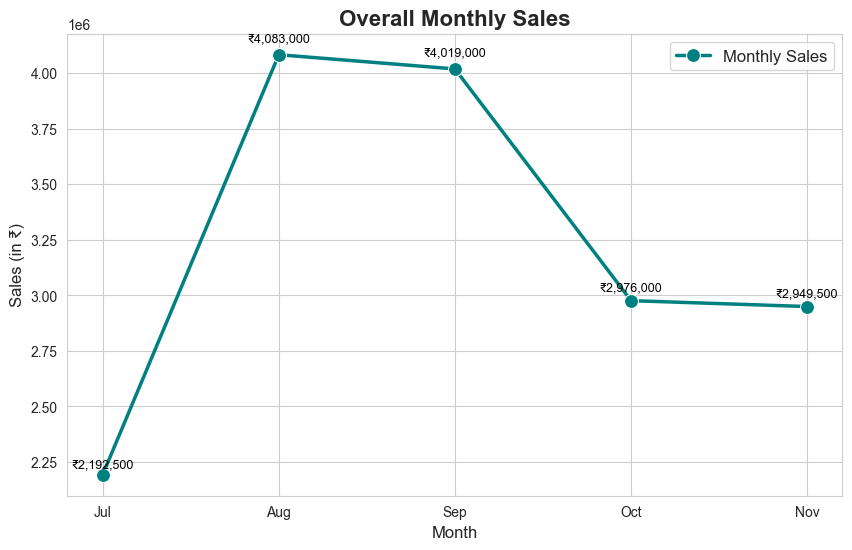

In [21]:
# Overall Monthly Sales
monthly_sales = overall_monthly_sales.T
monthly_sales.columns = ['Sales']
monthly_sales.reset_index(inplace=True)
monthly_sales.rename(columns={'index':'Month'} , inplace=True) # rename won't work unless you specify the inplace=True

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.lineplot(data=monthly_sales,x='Month',
             y='Sales',marker='o',color='teal',
             linewidth=2.5,markersize=10,label='Monthly Sales',
            )
plt.title('Overall Monthly Sales',fontsize=16,fontweight='bold')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Sales (in ₹)',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i,rows in monthly_sales.iterrows():
    plt.text(rows['Month'],rows['Sales']+(rows['Sales']*0.015),
              f"₹{rows['Sales']:,}",
             color='black',fontsize=9,ha='center' #ha='center': Horizontally centers the annotation above the data point.
            )
plt.legend(fontsize=12, loc='upper right')    
# plt.savefig('/kaggle/working/overall_monthly_sales.png', bbox_inches='tight')
plt.show()

In [145]:
calc_df_month_wise

,months,icu,post_icu,twin_share_cabin,single_cabin,general_male_word,general_female_word
0,Jul,275000,330000,272500,452500,345000,517500
1,Aug,525000,649000,477500,825000,663000,943500
2,Sep,545000,638000,462500,762500,675000,936000
3,Oct,405000,445500,312500,587500,514500,711000
4,Nov,400000,473000,312500,585000,505500,673500


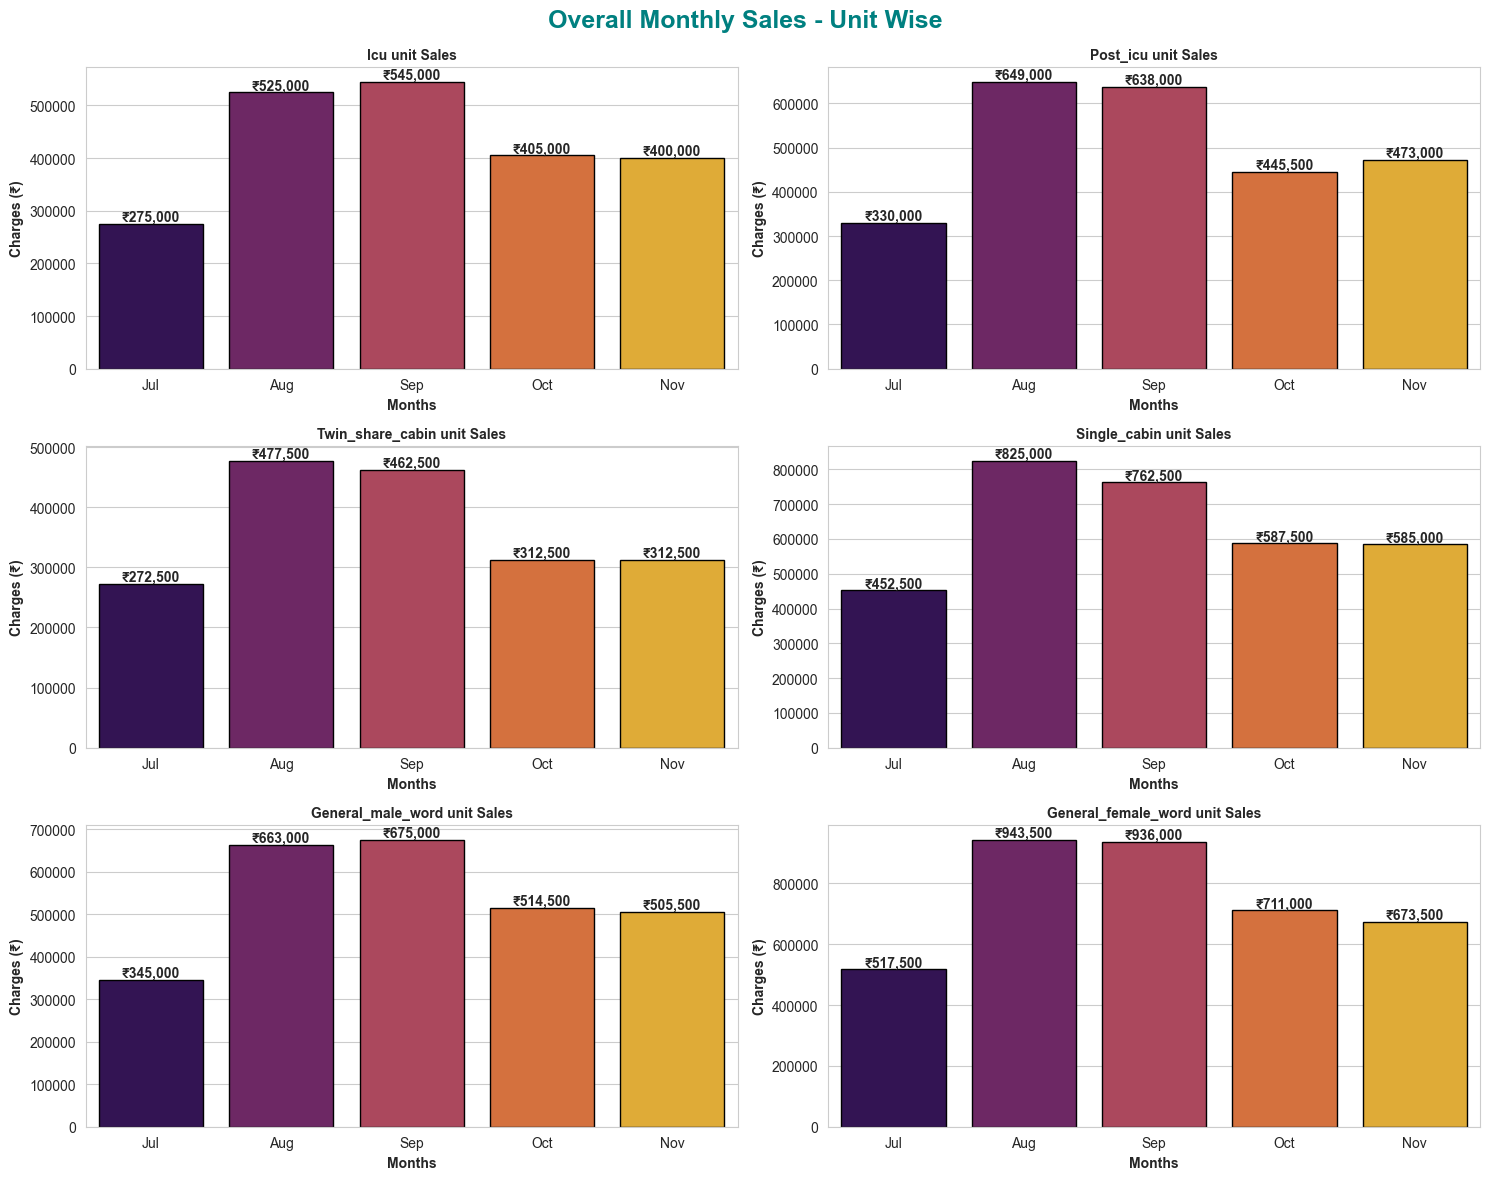

In [22]:
fig,ax = plt.subplots(3,2,figsize=(15,12))
sns.set_style('whitegrid')
cols = calc_df_month_wise.columns.tolist()
axes = ax.flatten() # [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]

for i,col_name in enumerate(cols[1:]):
    sns.barplot(data=calc_df_month_wise,x='months',
                y=calc_df_month_wise[col_name],palette='inferno',edgecolor='black',
                ax=axes[i])
    axes[i].set_title(f'{col_name.capitalize()} unit Sales',fontweight='bold',fontsize=10)
    axes[i].set_xlabel('Months',fontweight='bold',fontsize=10)
    axes[i].set_ylabel("Charges (₹)",fontweight='bold',fontsize=10)

    for bar in axes[i].patches:
        axes[i].annotate(
            f'₹{bar.get_height():,.0f}',
            (bar.get_x()+bar.get_width()/2,bar.get_height()),
            ha='center',va='bottom',fontsize=10,fontweight='bold')

# The rect parameter specifies a rectangle within which the subplots should fit. It's defined in terms of relative coordinates for the figure, ranging from 0 to 1 for each dimension.
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Format: [left, bottom, right, top]
fig.suptitle("Overall Monthly Sales - Unit Wise", fontsize=18, fontweight="bold", color="teal")
# plt.savefig('/kaggle/working/overall_monthly_sales_unitwise.png', bbox_inches='tight')
plt.show()

In [23]:
df_ot_occ_sample = df_ot_occ.drop(df_ot_occ.index[0:2],axis=0)
df_ot_occ_sample.reset_index(inplace=True)
df_ot_occ_sample.columns = df_ot_occ_sample.iloc[0]
df_ot_occ_sample = df_ot_occ_sample.drop(df_ot_occ_sample.index[0],axis=0).drop(df_ot_occ_sample.iloc[:,:1],axis=1)
df_ot_occ_sample = df_ot_occ_sample.iloc[1:78,:13]

col_names = []
for i,col_name in enumerate(df_ot_occ_sample.columns):
    if isinstance(col_name,float):
        col_names.append('date')
    else:
        if i <= 5:
           col_names.append(f"{col_name.replace(' ','_')}_ot1")
        else:
           col_names.append(f"{col_name.replace(' ','_')}_ot2")

df_ot_occ_sample.columns = col_names
df_ot_occ_sample['date'] = df_ot_occ_sample['date'].apply(lambda x : x.strftime("%Y-%m-%d") if not pd.isnull(x) else x)
df_ot_occ_sample['month'] = pd.to_datetime(df_ot_occ_sample['date'] , errors='coerce').dt.month.fillna(-1).astype(int)
df_ot_occ_sample = df_ot_occ_sample[['date','month', 'Patient_ID_ot1', 'Patient_Name_ot1', 'Diseases_ot1',
       'Type_of_Surgery_ot1', 'Name_of_Doctor_1_ot1', 'Name_of_Doctor_2_ot2',
       'Patient_ID_ot2', 'Patient_Name_ot2', 'Diseases_ot2',
       'Type_of_Surgery_ot2', 'Name_of_Doctor_1_ot2', 'Name_of_Doctor_2_ot2']]
df_ot_occ_sample.month.nunique()

4

In [24]:
# Define a custom mapping for months

calc_no_of_person_df_testing = calc_no_of_person_df.copy()
month_mapping = {
    "Jul": 0,
    "Aug": 1,
    "Sep": 2,
    "Oct": 3,
    "Nov": 4
}
calc_no_of_person_df_testing["months"] = calc_no_of_person_df_testing["months"].map(month_mapping)

calc_no_of_person_df_testing['months'].unique()
calc_no_of_person_df_testing


,months,icu,post_icu,twin_share_cabin,single_cabin,general_male_word,general_female_word,total_amount
0,0,55,60,109,181,230,345,2192500
1,1,105,118,191,330,442,629,4083000
2,2,109,116,185,305,450,624,4019000
3,3,81,81,125,235,343,474,2976000
4,4,80,86,125,234,337,449,2949500


In [28]:
from ctgan import CTGAN
ctgan = CTGAN()
ctgan.fit(calc_no_of_person_df_testing , epochs=300)

In [29]:
np.random.seed(42)
synthetic_data = ctgan.sample(3000)
synthetic_data['months'] = synthetic_data['months'].apply(lambda x : x if x in calc_no_of_person_df_testing['months'].unique().tolist() else None)
print('Number of Modes :',synthetic_data['months'].mode().tolist())
synthetic_data['months'] = synthetic_data['months'].fillna(synthetic_data['months'].mode()[0])
synthetic_data['months'] =  synthetic_data[['months']].astype('int')
synthetic_data['months'].unique()

Number of Modes : [3.0]


array([2, 3, 4, 1, 0])

In [30]:
synthetic_data

,months,icu,post_icu,twin_share_cabin,single_cabin,general_male_word,general_female_word,total_amount
0,2,80,72,128,220,386,324,3547028
1,2,89,77,158,169,496,498,2252350
2,3,71,74,115,200,356,299,3624884
3,3,98,96,163,252,354,476,2873456
4,2,66,106,168,226,477,468,2903634
...,...,...,...,...,...,...,...,...
2995,4,79,66,121,221,386,508,4161621
2996,3,103,113,178,267,532,445,2945164
2997,3,90,117,147,256,367,585,2395681
2998,4,98,125,125,277,424,431,3926847


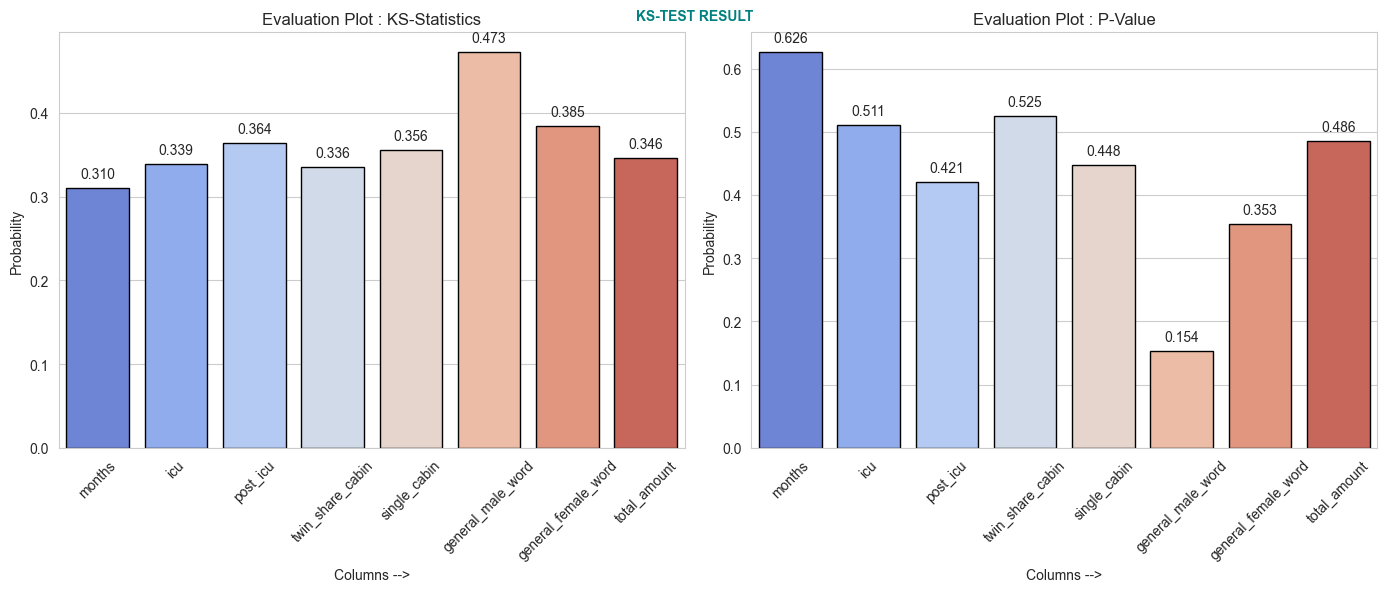

In [31]:
from scipy.stats import ks_2samp

# It's a two sample non parametric hypothesis test
def evaluation_matrix(original_data , generated_data):
    scores = {}
    for column in original_data.columns:
        if original_data[column].dtype != 'object':
            ks_statistics, p_value = ks_2samp(original_data[column] , generated_data[column])
            scores[column] = {'KS Statistics':ks_statistics , 'P-Value':p_value}
    return scores

result = evaluation_matrix(calc_no_of_person_df_testing,synthetic_data)
names, ks , pval = [],[],[]
for key in result:
    names.append(key)
    ks.append(result[key]['KS Statistics'])
    pval.append(result[key]['P-Value'])

evaluation_df = pd.DataFrame({'col_name':names,'ks_stats':ks , 'p_val':pval})

sns.set_style('whitegrid')

fig , ax = plt.subplots(1 , 2 , figsize=(14 , 6))
axes = ax.flatten()
sns.barplot(data=evaluation_df,x='col_name',y='ks_stats',
            palette='coolwarm',edgecolor='black',ax=axes[0])

sns.barplot(data=evaluation_df,x='col_name',y='p_val',
            palette='coolwarm',edgecolor='black',ax=axes[1])

axes[0].set_title('Evaluation Plot : KS-Statistics')
axes[0].set_xlabel('Columns -->')
axes[0].set_ylabel('Probability')
axes[0].tick_params(axis='x',rotation=45)

axes[1].set_title('Evaluation Plot : P-Value')
axes[1].set_xlabel('Columns -->')
axes[1].set_ylabel('Probability')
axes[1].tick_params(axis='x',rotation=45)

for i in range(2):
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.3f}",
                        (p.get_x()+p.get_width()/2. , p.get_height()),
                        ha='center',va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
fig.suptitle("KS-TEST RESULT", fontsize=10, fontweight="bold", color="teal")
plt.show()

In [25]:
import pandas as pd
synthetic_data = pd.read_csv('synthetic_data.csv')

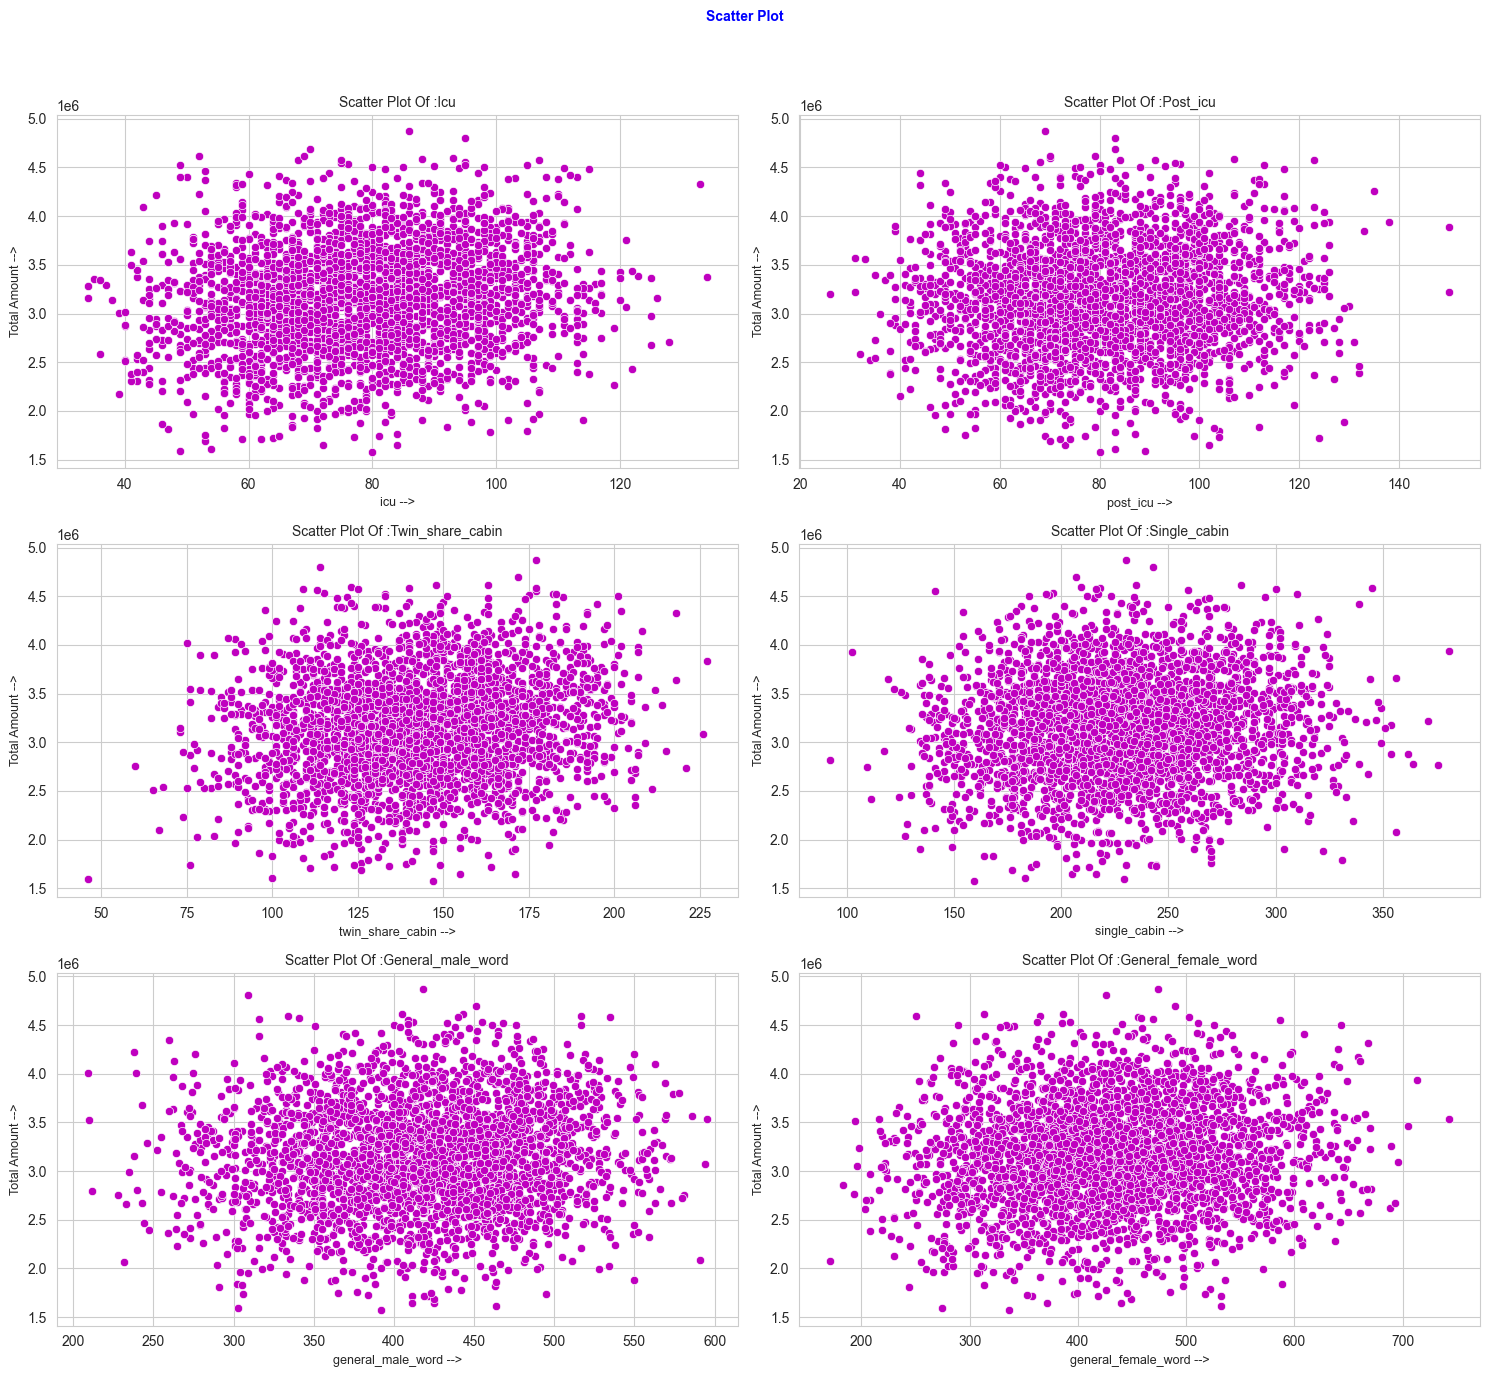

In [26]:
fig,ax = plt.subplots(3,2,figsize=(15,14))
sns.set_style('whitegrid')
axes =ax.flatten()
for i,col in enumerate(synthetic_data.columns[1:-1]):
    sns.scatterplot(data=synthetic_data, x=col, y='total_amount', ax=axes[i], color='m')
    axes[i].set_title(f'Scatter Plot Of :{col.capitalize()}',fontsize=10)
    axes[i].set_xlabel(f'{col} -->',fontsize=9)
    axes[i].set_ylabel('Total Amount -->',fontsize=9)

fig.suptitle("Scatter Plot",fontsize=10,color='blue',fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

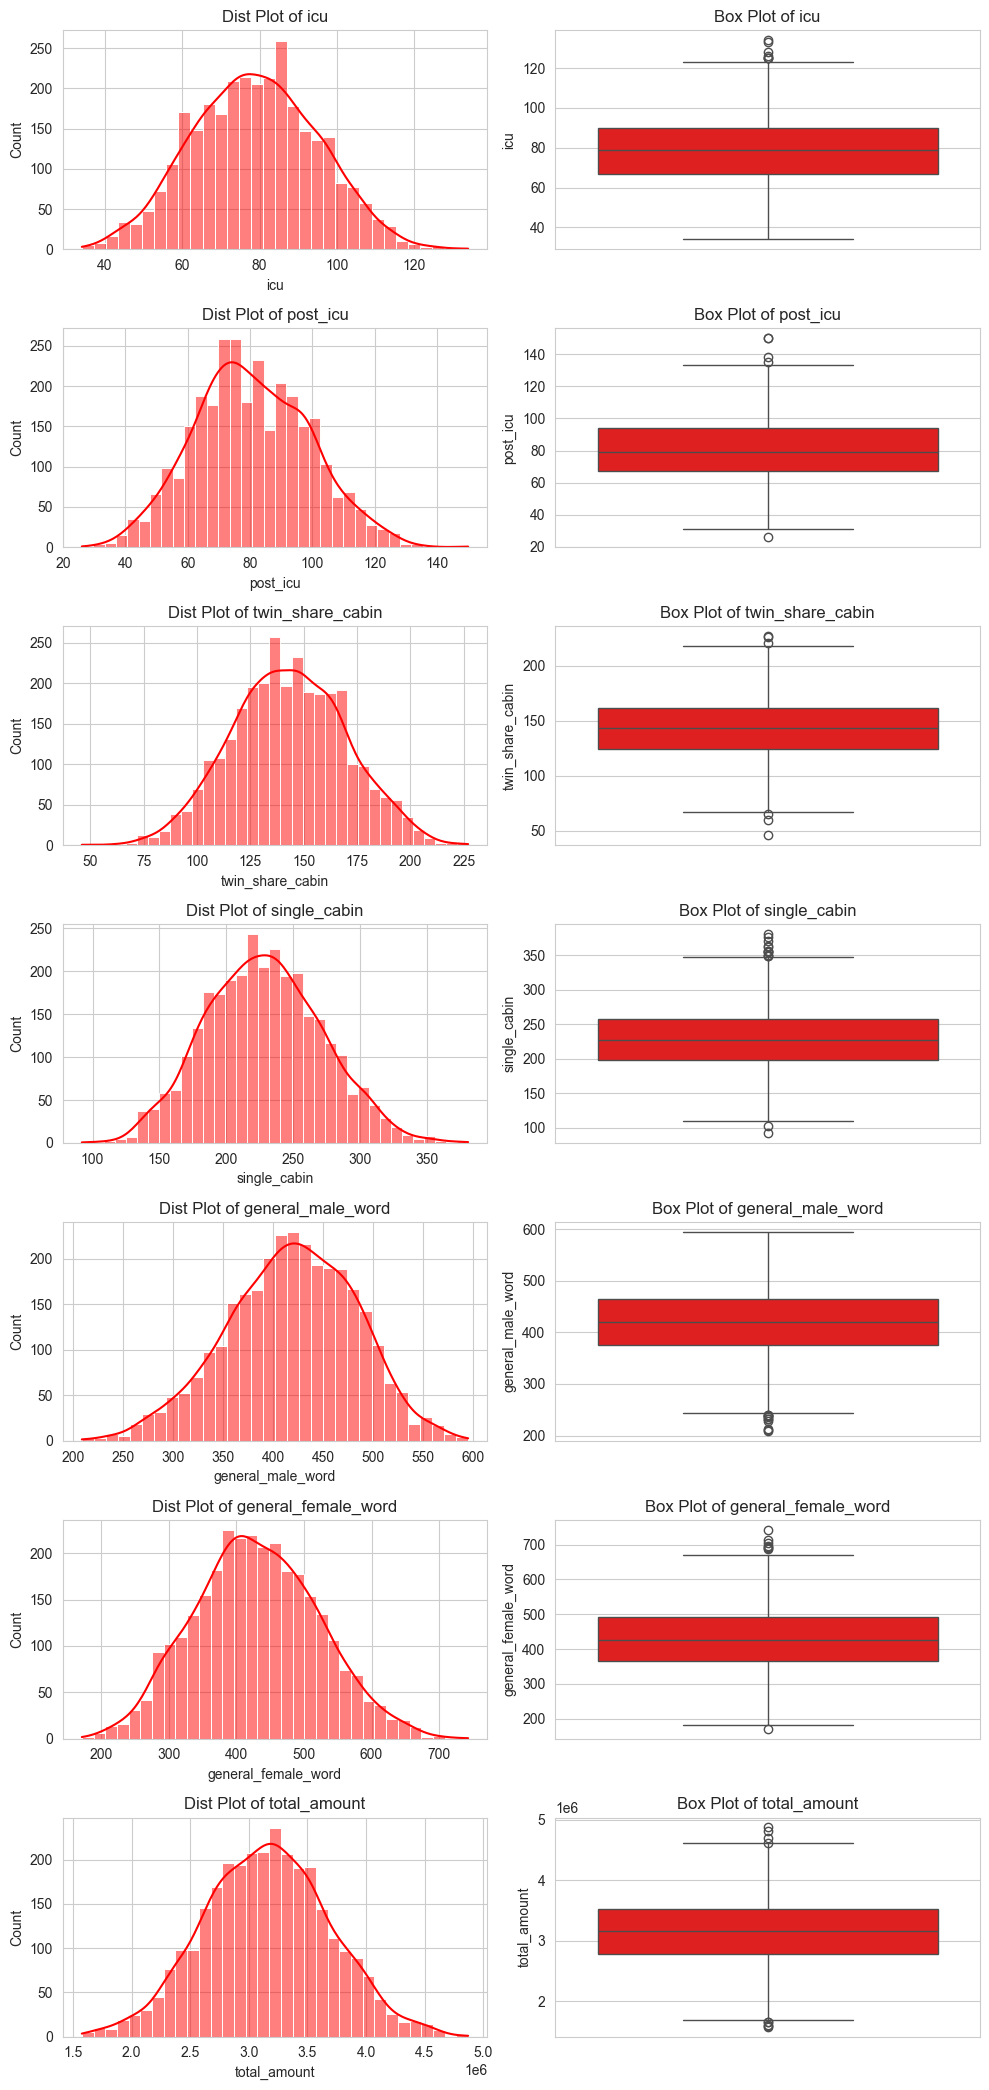

In [27]:
import math

n_cols = len(synthetic_data.columns[1:])
rows = math.ceil((n_cols*2)/2) # Each column need 2 plot
fig, ax = plt.subplots(rows, 2, figsize=(10, rows*3))
axes = ax.flatten()


ax_index = 0 
for col in synthetic_data.columns[1:]:
    sns.histplot(synthetic_data[col], kde=True,color='red',ax=axes[ax_index])
    axes[ax_index].set_title(f"Dist Plot of {col}")
    ax_index += 1
    
    sns.boxplot(synthetic_data[col],color='red',ax=axes[ax_index])
    axes[ax_index].set_title(f"Box Plot of {col}")
    ax_index += 1
    
plt.tight_layout()
plt.show()    

In [29]:
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,cross_validate, validation_curve
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import xgboost as xgb
from xgboost import plot_importance
import numpy as np

In [30]:
def IQR_Outliers(X, features):
    print("The Features are:", features)
    print("Total Number of Features is:", len(features))
    print("Total Number of Samples is:", len(X.index))

    outlier_idx_dict = {}
    all_outlier_idx = []

    for col in features:
        Q1 = np.nanpercentile(X[col], 25.0)
        Q3 = np.nanpercentile(X[col], 75.0)

        cut_off = (Q3 - Q1) * 1.5
        lower, upper = (Q1 - cut_off), (Q3 + cut_off)
        
        outlier_idx = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outlier_val = X[col][(X[col] < lower) | (X[col] > upper)].values

        outlier_idx_dict[col] = outlier_idx
        all_outlier_idx.extend(outlier_idx)

        print(f"Outlier size on {col} is:", len(outlier_idx))
        print(f"Outlier indexes on {col} are:", outlier_idx)

    # Unique and sorted list of all outliers
    all_outlier_idx = sorted(set(all_outlier_idx))
    print("Total Number of Unique Outliers:", len(all_outlier_idx))
    print("Unique Outlier Indexes:", all_outlier_idx)

        
IQR_Outliers(synthetic_data.iloc[:, 1:], synthetic_data.iloc[:, 1:].columns.tolist())


The Features are: ['icu', 'post_icu', 'twin_share_cabin', 'single_cabin', 'general_male_word', 'general_female_word', 'total_amount']
Total Number of Features is: 7
Total Number of Samples is: 3000
Outlier size on icu is: 7
Outlier indexes on icu are: [76, 116, 201, 638, 1596, 1935, 2630]
Outlier size on post_icu is: 5
Outlier indexes on post_icu are: [60, 1116, 1427, 2500, 2734]
Outlier size on twin_share_cabin is: 6
Outlier indexes on twin_share_cabin are: [656, 945, 1106, 1761, 1979, 2866]
Outlier size on single_cabin is: 14
Outlier indexes on single_cabin are: [99, 360, 400, 828, 899, 916, 1001, 1252, 1491, 1499, 1682, 2698, 2887, 2929]
Outlier size on general_male_word is: 11
Outlier indexes on general_male_word are: [13, 513, 579, 697, 719, 1184, 1342, 1370, 1403, 2057, 2322]
Outlier size on general_female_word is: 8
Outlier indexes on general_female_word are: [74, 584, 1424, 1562, 1563, 2188, 2429, 2528]
Outlier size on total_amount is: 9
Outlier indexes on total_amount are: [24

In [31]:
class OutlierRemover(object):
    def __init__(self,multiplier=1.5):
        self.multiplier = multiplier
        self.all_outlier_idx = []

    def fit(self , X , y=None):
        return self

    def transform(self, X , y=None):
        if not isinstance(X , pd.DataFrame):
            X = pd.DataFrame(X)
        if y is not None and not isinstance(y, pd.Series):
            y = pd.Series(y)
            
        total_indexes = list(X.index)
        outlier_idx = []
    
        for col in X.columns:
            
            if not np.issubdtype(X[col].dtype, np.number):
               continue
                 
            Q1 = np.nanpercentile(X[col], 25.0)
            Q3 = np.nanpercentile(X[col], 75.0)
    
            cut_off = (Q3 - Q1) * self.multiplier
            lower, upper = (Q1 - cut_off), (Q3 + cut_off)
            
            outlier_idx.extend(X[col][(X[col] < lower) | (X[col] > upper)].index.tolist())
            
        self.all_outlier_idx = sorted(set(outlier_idx))

        clean_idx = np.setdiff1d(total_indexes, self.all_outlier_idx)

        if y is not None:
            return X.loc[clean_idx] , y.loc[clean_idx]
        return X.loc[clean_idx]
        
    def fit_transform(self , X , y=None):
        return self.fit(X , y).transform(X , y)

X ,y = synthetic_data.iloc[:,1:-1],synthetic_data.iloc[:,-1]
rem = OutlierRemover(1.5)
X , y = rem.fit_transform(X , y)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X , y ,test_size=0.2,random_state=42,
    shuffle=True)

pipeline_ = Pipeline([
    ('inputer',SimpleImputer(strategy="mean")),
    ('Standard_Scaler', StandardScaler()),
    ('xgboost_regression', xgb.XGBRegressor(eval_metric='rmsle'))
])

# Parameter grid for GridSearchCV
param_grid = {
    'xgboost_regression__max_depth': [4, 6, 10, 15, 20],  
    'xgboost_regression__n_estimators': [100, 200, 300, 400],
    'xgboost_regression__learning_rate': [0.01, 0.015]
}

grid_search = GridSearchCV(
    estimator=pipeline_,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)

# Fitting the grid search
grid_search.fit(np.array(X_train).reshape(X_train.shape[0], -1), np.array(y_train).flatten())

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

C:\Users\arups\.conda\envs\h_dev\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\arups\.conda\envs\h_dev\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defi

Fitting 3 folds for each of 40 candidates, totalling 120 fits


C:\Users\arups\.conda\envs\h_dev\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\arups\.conda\envs\h_dev\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defi

Best Parameters: {'xgboost_regression__learning_rate': 0.01, 'xgboost_regression__max_depth': 4, 'xgboost_regression__n_estimators': 100}
Best Score: nan


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X , y ,test_size=0.2,random_state=42,
    shuffle=True)

pipe_line = Pipeline([
    ('inputer',SimpleImputer(strategy="mean")),
    ('Standard_Scaler', StandardScaler()),
    ('xgboost_regression', xgb.XGBRegressor(eval_metric='rmsle',n_estimators=100,max_depth=4,learning_rate=0.01))
])

pipe_line.fit(X_train , y_train)

Pipeline(steps=[('inputer', SimpleImputer()),
                ('Standard_Scaler', StandardScaler()),
                ('xgboost_regression',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='rmsle',
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [10]:
prediction = pipe_line.predict(X_test)
print(prediction)

[3134909.5 3193756.2 3141555.8 2925502.  3131406.2 3183879.8 3119157.5
 3021050.5 3129233.5 3075600.2 3260049.2 3003278.  3048703.8 3216871.2
 3285257.2 3016052.  3022642.  3204689.  3141667.8 3152219.5 3170130.2
 3148023.  3243929.5 3164508.  3108926.2 3262344.2 3123372.  3140012.8
 3203122.2 3103001.8 3146398.8 3150462.2 3046582.2 3134147.8 3122653.8
 3249139.2 3258754.8 3126984.8 3156607.5 3225701.2 3087033.2 3204353.5
 3051889.8 3145505.5 3243929.5 3069176.8 3137595.  3142693.8 3130493.
 3151094.5 3220710.8 3151587.2 3257182.2 3270432.  3108458.5 3045067.
 3017411.  3109553.  3256459.8 3113347.2 3142007.8 3122358.2 3173300.8
 3118806.  3139197.5 3173793.5 3108926.2 2967253.5 3247519.  2972841.5
 3275691.8 3146966.  3108139.8 3128283.2 3139157.8 3298467.5 3231697.
 3164508.  3145504.  3164508.  3258754.8 3138887.8 3142677.8 3119157.5
 3243929.5 3015479.8 3152219.5 3058621.  3138072.5 3115594.  3193243.
 2990669.2 3038012.  3141568.8 3084951.5 3066808.2 2957272.2 3090292.2
 3148860.8

In [12]:
from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt(mean_squared_log_error(y_test , prediction))
print("The score is %.5f" % RMSLE )

The score is 0.17368


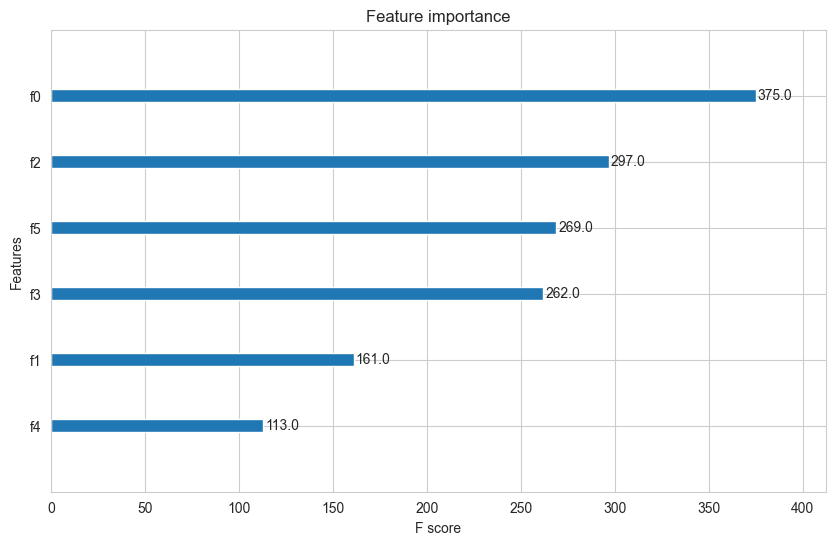

In [18]:
xgb_model = pipe_line.named_steps['xgboost_regression']
fig , ax = plt.subplots(1,1,figsize=(10,6))
plot_importance(xgb_model , ax=ax)
plt.show()

In [32]:
# user = np.array([[89,77,158,169,496]])	#2252350
# prediction2 = pipe_line.predict(user)
# print(prediction2)

from joblib import dump

dump(pipe_line, 'xgboost_pipeline_model.joblib')

NameError: name 'pipe_line' is not defined

In [33]:
from joblib import load

model = load('xgboost_pipeline_model.joblib')
user = np.array([[1,22,56,45,75,45],
                 [55,45,444,42,12,45]])	#2252350
prediction2 = model.predict(user)
print(prediction2)



[2973708.5 3151882. ]


In [83]:
user_array = {'Dec':[1,22,56,45,75,45],
              'Jan':[456,118,444,445,1222,629], # post_icu 45+73 and gfw=45+584
              'Feb':[109,116,185,305,450,624]
             }
target_1st =  calc_no_of_person_df_testing['total_amount'].max().astype(int)
target_threshold = calc_no_of_person_df_testing['total_amount'].mean().astype(int)

user_df = pd.DataFrame(user_array).T
user_df.columns = calc_no_of_person_df_testing.columns[1:-1]
user_df.reset_index(inplace=True)
user_df.rename(columns={'index':'months'},inplace=True)

user_df_array = np.array(user_df.iloc[: , 1:])
prediction = model.predict(user_df_array)
prediction = [int(p) for p in prediction]

user_df['predictions'] = prediction
print(user_df.shape)
user_df


(3, 8)


,months,icu,post_icu,twin_share_cabin,single_cabin,general_male_word,general_female_word,predictions
0,Dec,1,22,56,45,75,45,2973708
1,Jan,456,118,444,445,1222,629,3186698
2,Feb,109,116,185,305,450,624,3159058


In [84]:
calc_no_of_person_df_testing.copy()

,months,icu,post_icu,twin_share_cabin,single_cabin,general_male_word,general_female_word,total_amount
0,0,55,60,109,181,230,345,2192500
1,1,105,118,191,330,442,629,4083000
2,2,109,116,185,305,450,624,4019000
3,3,81,81,125,235,343,474,2976000
4,4,80,86,125,234,337,449,2949500


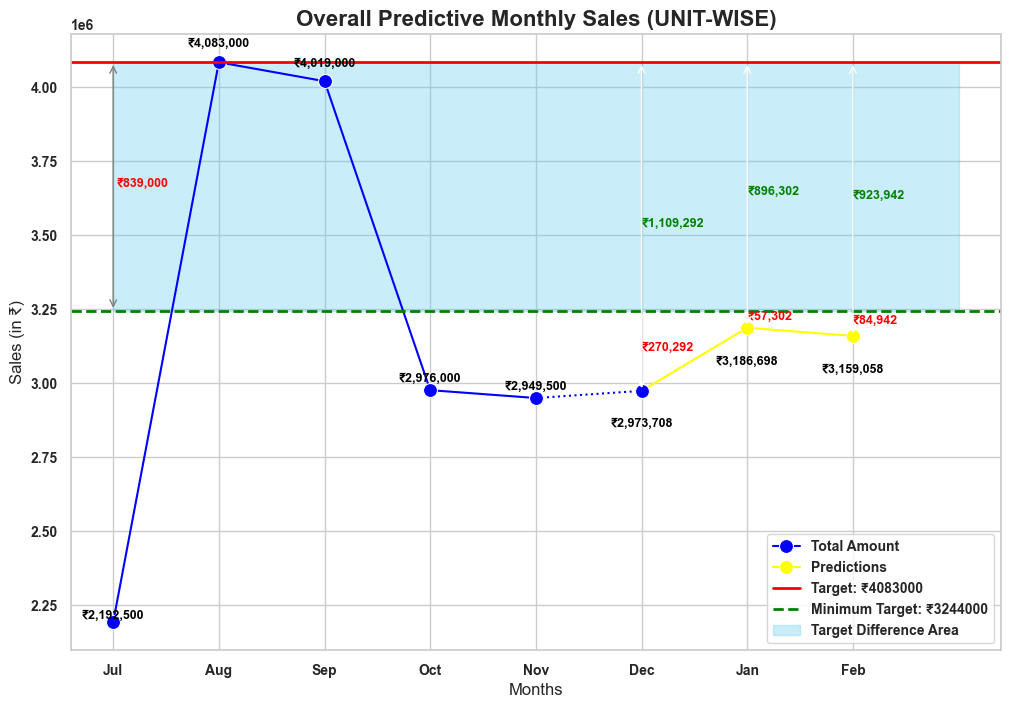

In [200]:
month_mapping = {
    0:"Jul",
    1:"Aug",
    2:"Sep",
    3:"Oct",
    4:"Nov"
}
plt.rcParams.update({
    'font.size': 12,
    'font.weight': 'bold',
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

calc_no_of_person_df_testing_copy = calc_no_of_person_df_testing.copy()
calc_no_of_person_df_testing_copy['months'] = calc_no_of_person_df_testing_copy['months'].map(month_mapping)

fig , ax = plt.subplots(1,1 , figsize=(12,8))

sns.set(style="whitegrid")

sns.lineplot(data=calc_no_of_person_df_testing_copy,
            x = 'months',y='total_amount',ax=ax,marker='o',markersize=10,color='Blue',label="Total Amount")

sns.lineplot(data=user_df,
            x = 'months',y='predictions',ax=ax,marker='o',markersize=10,color='yellow',label="Predictions")

plt.axhline(y=target_1st, color='red', linestyle='-', linewidth=2, label=f"Target: ₹{target_1st}")
plt.axhline(y=target_threshold , color='green',linestyle='--',linewidth=2 ,label=f"Minimum Target: ₹{target_threshold}")

# Draw vertical lines with arrows pointing from the lower to the higher target
plt.annotate('',xy=(0,target_threshold),
             xytext=(0,target_1st),arrowprops=dict(color='gray',arrowstyle='<->')
            )
plt.text(0.03 ,(target_threshold+target_1st)//2 ,f'₹{(target_1st-target_threshold):,}',fontsize=9,color='red') # This the the target_1st-target_threshold

plt.fill_between(
    [0, (calc_no_of_person_df_testing_copy.shape[0]+user_df.shape[0])],  # X-range (months), adjust this if your x-axis is different
    target_threshold, target_1st,  # Y-range for the shaded area
    color='#4CC9F0', alpha=0.3, label="Target Difference Area"
)

for i,row in calc_no_of_person_df_testing_copy.iterrows():
    plt.text(row['months'],row['total_amount']+(row['total_amount']*0.02),
             f"₹{row['total_amount']:,}",ha='center',va='top',color='black',fontsize=9
            )

for i,row in user_df.iterrows():
    plt.text(row['months'],row['predictions']+(row['predictions']*-0.03),
             f"₹{row['predictions']:,}",ha='center',va='top',color='black',fontsize=9
            )
    plt.annotate('',xy=(row['months'],target_threshold),
             xytext=(row['months'],row['predictions']),arrowprops=dict(color='white',arrowstyle='<->')
            )
    plt.text(row['months'], (target_threshold + row['predictions']) // 2, 
         f'₹{(target_threshold - row["predictions"]):,}', 
         fontsize=9, color='red')

    plt.annotate('',xy=(row['months'],target_1st),
             xytext=(row['months'],row['predictions']),arrowprops=dict(color='white',arrowstyle='<->')
            )
    plt.text(row['months'], (target_1st + row['predictions']) // 2, 
         f'₹{(target_1st - row["predictions"]):,}', 
         fontsize=9, color='Green')

x1 = calc_no_of_person_df_testing_copy.iloc[[-1]]['months'].values[0]
y1 = calc_no_of_person_df_testing_copy.iloc[[-1]]['total_amount'].values[0]
y2 = user_df.iloc[[0]]['predictions'].values[0]
x2 = user_df.iloc[[0]]['months'].values[0]
segment_df = pd.DataFrame([[x1 , y1],
                           [x2 , y2]],columns=['x' , 'y'])
sns.lineplot(data=segment_df,x='x',y='y',color='blue',ax=ax,marker='o',markersize=10,linestyle=':')

    
plt.title('Overall Predictive Monthly Sales (UNIT-WISE)',fontsize=16,fontweight='bold')
plt.xlabel('Months',fontsize=12)
plt.ylabel('Sales (in ₹)',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc='lower right')
plt.savefig('overall_predictive_monthly_sales.png',transparent=True, bbox_inches='tight')
plt.show()




In [187]:
# import plotly.io as pio
# import plotly.graph_objs as go
# import pandas as pd

# pio.renderers.default = 'iframe'

# month_mapping = {
#     0:"Jul",
#     1:"Aug",
#     2:"Sep",
#     3:"Oct",
#     4:"Nov"
# }

# calc_no_of_person_df_testing_copy = calc_no_of_person_df_testing.copy()
# calc_no_of_person_df_testing_copy['months'] = calc_no_of_person_df_testing_copy['months'].map(month_mapping)

# fig = go.Figure()

# fig.add_shape(
#     type="line",
#     x0=0,
#     y0=calc_no_of_person_df_testing_copy['total_amount'].mean(),
#     x1=(calc_no_of_person_df_testing_copy.shape[0]+user_df.shape[0]),
#     y1=calc_no_of_person_df_testing_copy['total_amount'].mean(),
#     xref='x', # This is important we took ref form x axis
#     yref='y',
#     line=dict(color="LightSeaGreen", width=3, dash="solid") 
    
# )
# fig.add_shape(
#     type="line",
#     x0=0,
#     y0=calc_no_of_person_df_testing_copy['total_amount'].max(),
#     x1=(calc_no_of_person_df_testing_copy.shape[0]+user_df.shape[0]),
#     y1=calc_no_of_person_df_testing_copy['total_amount'].max(),
#     xref='x', # This is important we took ref form x axis
#     yref='y',
#     line=dict(color="DarkOrange", width=3, dash="solid") 
# )

# fig.add_shape(
#     type="rect",
#     x0=0,
#     y0=calc_no_of_person_df_testing_copy['total_amount'].mean(),
#     x1=(calc_no_of_person_df_testing_copy.shape[0]+user_df.shape[0]),
#     y1=calc_no_of_person_df_testing_copy['total_amount'].max(),
#     xref='x',
#     yref='y',
#     fillcolor='lightblue',
#     opacity=0.3,
#     line_width=0
# )

# # Double headed Arrow
# fig.add_annotation(
#     x=0.09,
#     y=calc_no_of_person_df_testing_copy['total_amount'].mean(),
#     ax=0.09,
#     ay=calc_no_of_person_df_testing_copy['total_amount'].max(),
#     xref='x',
#     yref='y',
#     axref='x',
#     ayref='y',
#     arrowcolor='red',
#     showarrow=True,
#     arrowhead=1,  # Arrowhead style(Always int) 
#     arrowsize=1,  # Arrow size
#     arrowwidth=2,
# )

# fig.add_annotation(
#     x=0.09,
#     y=calc_no_of_person_df_testing_copy['total_amount'].max(),
#     ax=0.09,
#     ay=calc_no_of_person_df_testing_copy['total_amount'].mean(),
#     xref='x',
#     yref='y',
#     axref='x',
#     ayref='y',
#     arrowcolor='red',
#     showarrow=True,
#     arrowhead=1,  # Arrowhead style
#     arrowsize=1,  # Arrow size
#     arrowwidth=2
# )

# fig.add_annotation(
#     x=0.22,
#     y=(calc_no_of_person_df_testing_copy['total_amount'].mean() + calc_no_of_person_df_testing_copy['total_amount'].max()) / 2,
#     text=f"₹{(int(abs(calc_no_of_person_df_testing_copy['total_amount'].mean()-calc_no_of_person_df_testing_copy['total_amount'].max()))):,}",
#     showarrow=False,
#     font=dict(size=12),
#     textangle=90,
#     xanchor="center",
#     yanchor="bottom",
#     xref='x',
#     yref='y',
#     axref='x',
#     ayref='y'
# )
# for i, row in user_df.iterrows():
#     # Arrow from prediction to max
#     fig.add_annotation(
#         x=row['months'],  # X-coordinate for the arrow
#         y=row['predictions'],  # Starting Y-coordinate (prediction value)
#         ax=row['months'],  # X-coordinate remains the same
#         ay=calc_no_of_person_df_testing_copy['total_amount'].max(),  # Ending Y-coordinate (max value)
#         text=f"{(calc_no_of_person_df_testing_copy['total_amount'].max() - row['predictions']):,.2f}",
#         showarrow=True,
#         font=dict(size=12, color='red'),  # Text properties
#         arrowhead=1,
#         arrowsize=1,
#         arrowwidth=2,
#         arrowcolor='red'
#     )
    

# fig.add_trace(go.Scatter(
#     x=calc_no_of_person_df_testing_copy['months'],
#     y=calc_no_of_person_df_testing_copy['total_amount'],
#     mode='lines+markers+text',
#     marker=dict(size=10),
#     line=dict(color='blue'),
#     text = [f"₹{x:,}" for x in calc_no_of_person_df_testing_copy['total_amount']],
#     textposition="top center"
# ))

# fig.add_trace(go.Scatter(
#     x = user_df['months'],
#     y = user_df['predictions'],
#     mode = 'lines+markers',
#     marker = dict(size=10),
#     line = dict(color='yellow'),
#     name = "Predictions",
#     text = [f"₹{x:,}" for x in user_df['predictions']]
# ))


# x1 = calc_no_of_person_df_testing_copy.iloc[-1]['months']
# y1 = calc_no_of_person_df_testing_copy.iloc[-1]['total_amount']
# x2 = user_df.iloc[0]['months']
# y2 = user_df.iloc[0]['predictions']

# fig.add_trace(go.Scatter(
#     x = [x1,x2],
#     y = [y1,y2],
#     mode = "lines+markers",
#     line=dict(color='yellow',dash='dot'),
#     marker=dict(size=10),
#     name = "Segment"
# ))

# fig.update_layout(
#     title="Overall Predictive Monthly Sales (UNIT-WISE)",
#     xaxis_title = "Months",
#     yaxis_title = "Sales (in ₹)",
#     yaxis=dict(tickformat="₹,.2f"),
#     font = dict(size=12,family="Arial"),
#     legend = dict(font=dict(size=10),yanchor='top',xanchor='right' , x= (calc_no_of_person_df_testing_copy.shape[0]+user_df.shape[0])-0.01,
#                  y = 0.99),
#     template='plotly_dark'
# )


# fig.show()

In [86]:
# Target
def close_chk(df, col ,mode='mean_line'):
    
    if mode=='mean_line':
        target_mean = calc_no_of_person_df_testing_copy['total_amount'].mean()
        df['diff'] = abs(df[col] - target_mean)
        idx = df['diff'].idxmin()
    else:
        return df.loc[df[col].idxmax(),['icu','post_icu','twin_share_cabin','single_cabin','general_male_word','general_female_word']]
        
    return df.loc[idx,['icu','post_icu','twin_share_cabin','single_cabin','general_male_word','general_female_word']]
    
mean_line_dic = dict(close_chk(calc_no_of_person_df_testing_copy , 'total_amount','mean_line'))
target_line_dic = dict(close_chk(calc_no_of_person_df_testing_copy , 'total_amount','target_line'))
mean_line_dic

{'icu': 81,
 'post_icu': 81,
 'twin_share_cabin': 125,
 'single_cabin': 235,
 'general_male_word': 343,
 'general_female_word': 474}

In [158]:
def sol(df , target_mean , target_max):
    # Points which are upper from the meanline
    upper_df = df[(df['predictions'] >= target_mean) & (df['predictions'] < target_max)].loc[:,['months','icu','post_icu','twin_share_cabin','single_cabin','general_male_word','general_female_word']]
    # Points which are lower from the meanline
    lower_df = df[(df['predictions'] < target_mean)].loc[:,['months','icu','post_icu','twin_share_cabin','single_cabin','general_male_word','general_female_word']]

    result_upper_maxline_target_df = upper_df.copy() # upper points to maxline diff dataframe
    result_lower_meanline_target_df =lower_df.copy()
    result_lower_maxline_target_df = lower_df.copy()
    
    for col in target_line_dic:
        result_upper_maxline_target_df[col]= target_line_dic[col] - upper_df[col]
        result_upper_maxline_target_df[col]= result_upper_maxline_target_df[col].clip(lower=0)
        result_lower_maxline_target_df[col] = target_line_dic[col] - lower_df[col]
        result_lower_maxline_target_df[col] = result_lower_maxline_target_df[col].clip(lower=0)
        
    for col in mean_line_dic:
        result_lower_meanline_target_df[col] = mean_line_dic[col] - lower_df[col]
        result_lower_meanline_target_df[col] = result_lower_meanline_target_df[col].clip(lower=0)

    
    result_lower_to_maxline_target_df = pd.concat([result_lower_maxline_target_df,result_upper_maxline_target_df]).sort_index()
    return result_lower_meanline_target_df,result_lower_to_maxline_target_df
    
result_lower_meanline_target_df,result_lower_to_maxline_target_df = sol(user_df , calc_no_of_person_df_testing_copy['total_amount'].mean() , calc_no_of_person_df_testing_copy['total_amount'].max())  
result_lower_meanline_target_df


,months,icu,post_icu,twin_share_cabin,single_cabin,general_male_word,general_female_word
0,Dec,80,59,69,190,268,429
1,Jan,0,0,0,0,0,0
2,Feb,0,0,0,0,0,0


In [166]:
result_lower_to_maxline_target_df_transpose

months,Dec,Jan,Feb
icu,104,0,0
post_icu,96,0,2
twin_share_cabin,135,0,6
single_cabin,285,0,25
general_male_word,367,0,0
general_female_word,584,0,5


In [175]:
result_lower_meanline_target_df_transpose = result_lower_meanline_target_df.T
result_lower_meanline_target_df_transpose.columns = result_lower_meanline_target_df_transpose.iloc[0]
result_lower_meanline_target_df_transpose = result_lower_meanline_target_df_transpose[1:]

result_lower_to_maxline_target_df_transpose = result_lower_to_maxline_target_df.T
result_lower_to_maxline_target_df_transpose.columns = result_lower_to_maxline_target_df_transpose.iloc[0]
result_lower_to_maxline_target_df_transpose = result_lower_to_maxline_target_df_transpose[1:]



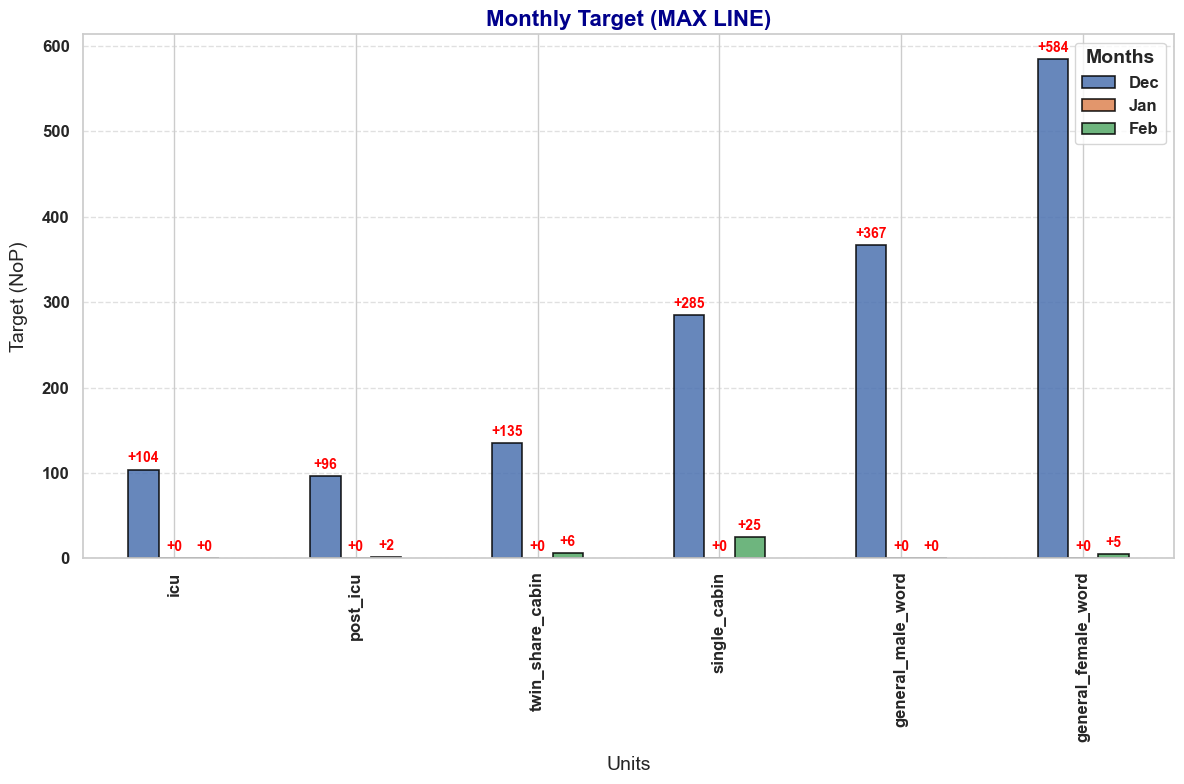

In [198]:
ax = result_lower_to_maxline_target_df_transpose.plot(kind='bar',
                                                      edgecolor='black',
                                                      figsize=(12,8),
                                                      alpha=0.85,
                                                      linewidth=1.2
                                                     )
plt.title("Monthly Target (MAX LINE)",color='darkblue',fontsize=16,fontweight='bold')
plt.xlabel('Units',fontsize=14,labelpad=10)
plt.ylabel('Target (NoP)',fontsize=14,labelpad=10)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Months',loc='upper right',fontsize=12,title_fontsize=14)
plt.grid(axis='y',linestyle='--',alpha=0.6)

for container in ax.containers:
    ax.bar_label(container,fmt=f"+%.0f",label_type='edge',fontsize=10,color='red',padding=3)

plt.tight_layout()
plt.savefig('monthly_target_to_maxline.png', dpi=300, bbox_inches='tight')
plt.show()

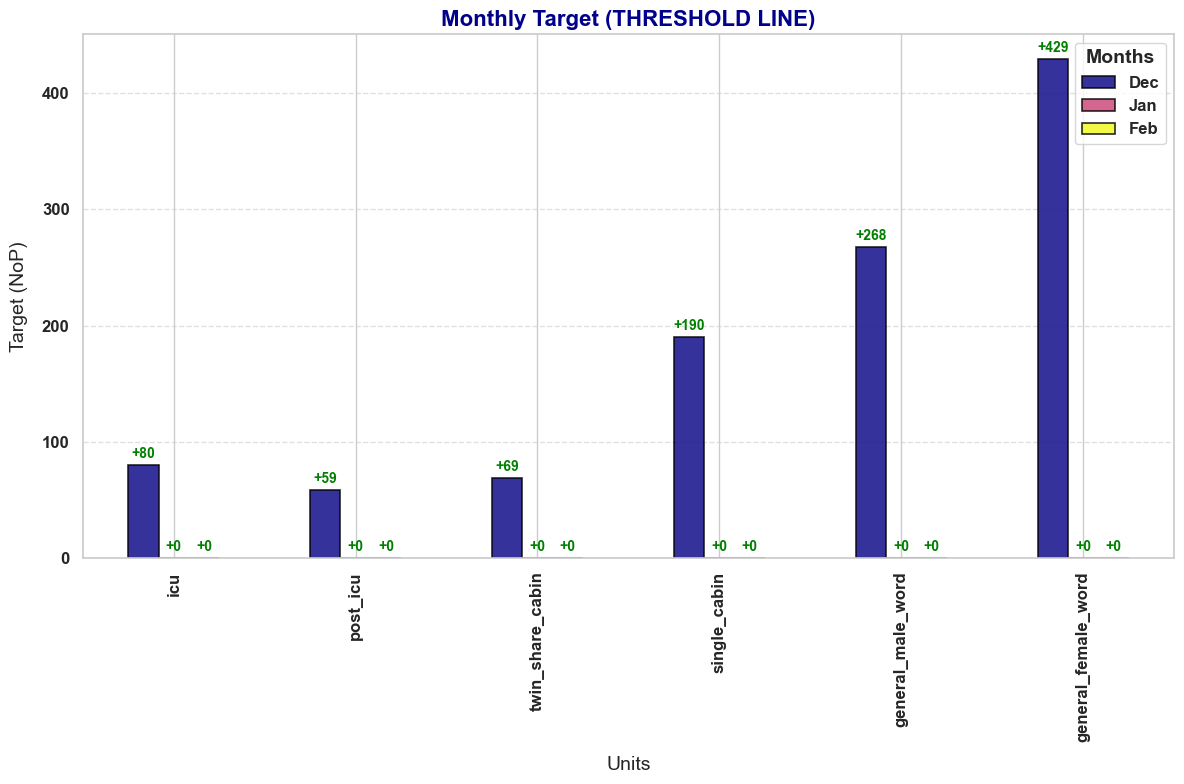

In [199]:
ax1 = result_lower_meanline_target_df_transpose.plot(kind='bar',
                                                      edgecolor='black',
                                                      figsize=(12,8),
                                                      linewidth=1.2,
                                                      colormap='plasma',
                                                      alpha=0.83
                                                     )
plt.title("Monthly Target (THRESHOLD LINE)",color='darkblue',fontsize=16,fontweight='bold')
plt.xlabel('Units',fontsize=14,labelpad=10)
plt.ylabel('Target (NoP)',fontsize=14,labelpad=10)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Months',loc='upper right',fontsize=12,title_fontsize=14)
plt.grid(axis='y',linestyle='--',alpha=0.6)

for container in ax1.containers:
    ax1.bar_label(container,fmt=f"+%.0f",label_type='edge',fontsize=10,color='green',padding=3)

plt.tight_layout()
plt.savefig('Monthly_target_to_threshold_line.png')
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup

# Define the URL
link = 'https://www.google.com/search?q=diplomat+nursing+home+burdwan+review'

# Add headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

# Fetch the page content
P_link = requests.get(link, headers=headers)

# Check response status
if P_link.status_code == 200:
    print("Request Successful!")
    # Parse the HTML content
    P_html = P_link.text
    P_soup = BeautifulSoup(P_html, "html.parser")
    
    # Print or inspect parsed content
    print(P_soup.prettify())  # Prints the formatted HTML content
else:
    print(f"Failed to retrieve the page. Status Code: {P_link.status_code}")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create dataset
X = x.reshape(-1, 1)  # Reshape for sklearn
y = 2 * x + np.random.randn(100) * 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred, color="green", alpha=0.6)
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Ideal line
plt.grid()
plt.show()



In [ ]:
# # import os

# # if not os.path.exists('/kaggle/working/output'):
# #     os.makedirs('/kaggle/working/output')
    
# # final_df.to_csv('/kaggle/working/output/final_df.csv',index=False)

# calc_df_month_wise.set_index('months')[['icu', 'post_icu', 'twin_share_cabin', 'single_cabin', 'general_male_word', 'general_female_word']].T.plot(kind='bar', stacked=True, figsize=(12,6))
# plt.title('Stacked Bar Plot: Monthly Breakdown of Charges', fontsize=16, fontweight='bold')
# plt.xlabel('Months', fontsize=12)
# plt.ylabel('Amount (in ₹)', fontsize=12)
# plt.xticks(rotation=0)
# plt.legend(title='Category', fontsize=10)
# plt.show()

import pandas as pd
import numpy as np

# Original data
# data = {
#     "months": ["Jul", "Aug", "Sep", "Oct", "Nov"],
#     "icu": [275000, 525000, 545000, 405000, 400000],
#     "post_icu": [330000, 649000, 638000, 445500, 473000],
#     "twin_share_cabin": [272500, 477500, 462500, 312500, 312500],
#     "single_cabin": [452500, 825000, 762500, 587500, 585000],
#     "general_male_word": [345000, 663000, 675000, 514500, 505500],
#     "general_female_word": [517500, 943500, 936000, 711000, 673500]
# }
# df = pd.DataFrame(data)

# # Generate future data based on 5% increase per month
# future_months = 12
# latest_data = df.iloc[-1].copy()

# for i in range(1, future_months + 1):
#     new_row = latest_data.copy()
#     new_row["months"] = f"Future_{i}"  # Placeholder month name
#     for col in df.columns[1:]:
#         new_row[col] *= 1.05  # Increase by 5%
#     df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# print(df)

from ctgan import CTGAN
import pandas as pd

# Prepare your dataset
data = pd.DataFrame({
    "months": ["Jul", "Aug", "Sep", "Oct", "Nov"],
    "icu": [275000, 525000, 545000, 405000, 400000],
    "post_icu": [330000, 649000, 638000, 445500, 473000],
    "twin_share_cabin": [272500, 477500, 462500, 312500, 312500],
    "single_cabin": [452500, 825000, 762500, 587500, 585000],
    "general_male_word": [345000, 663000, 675000, 514500, 505500],
    "general_female_word": [517500, 943500, 936000, 711000, 673500]
})

# Convert categorical column to numeric (if necessary)
data["months"] = pd.factorize(data["months"])[0]

# Train the CTGAN model
ctgan = CTGAN()
ctgan.fit(data, epochs=500)

# Generate synthetic data
synthetic_data = ctgan.sample(100)
print(synthetic_data.head())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.title('XGBoost Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.show()